In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, Imputer
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.utils import class_weight
from sklearn.manifold import TSNE

In [2]:
dataset = pd.read_csv('winequalityN.csv')

In [3]:
dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
dataset.type.value_counts(dropna=False)

white    4898
red      1599
Name: type, dtype: int64

In [5]:
dataset.quality.value_counts(dropna=False)

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [6]:
columns = list(dataset.columns)

In [7]:
for item in columns:
    print(dataset[item].value_counts(dropna=False))

white    4898
red      1599
Name: type, dtype: int64
6.80     354
6.60     326
6.40     305
7.00     282
6.90     279
7.20     273
6.70     264
7.10     257
6.50     242
7.40     238
7.30     222
6.20     210
6.30     201
7.60     199
6.00     197
7.50     174
6.10     169
7.80     146
7.70     141
5.80     125
8.00     122
7.90     116
5.90     111
8.20     101
8.30      92
5.70      90
5.60      85
8.10      82
8.40      61
8.60      52
        ... 
12.70      4
12.40      4
11.80      4
11.70      3
13.30      3
11.00      3
4.40       3
13.20      3
13.00      3
6.15       2
13.70      2
4.20       2
15.00      2
7.15       2
4.60       2
15.60      2
12.90      2
15.50      2
14.00      1
3.90       1
4.50       1
12.10      1
14.30      1
15.90      1
13.80      1
13.50      1
13.40      1
3.80       1
14.20      1
6.45       1
Name: fixed acidity, Length: 107, dtype: int64
0.280    286
0.240    265
0.260    255
0.250    238
0.220    235
0.270    232
0.230    221
0.200    217
0.3

In [8]:
dataset.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [9]:
dataset[dataset['fixed acidity'].isnull()]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,white,NaN,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
174,white,NaN,0.270,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5
249,white,NaN,0.410,0.14,10.4,0.037,18.0,119.0,0.99600,3.38,0.45,10.0,5
267,white,NaN,0.580,0.07,6.9,0.043,34.0,149.0,0.99440,3.34,0.57,9.7,5
368,white,NaN,0.290,0.48,2.3,0.049,36.0,178.0,0.99310,3.17,0.64,10.6,6
518,white,NaN,0.130,0.28,1.9,0.050,20.0,78.0,0.99180,3.43,0.64,10.8,6
1079,white,NaN,NaN,0.29,6.2,0.046,29.0,227.0,0.99520,3.29,0.53,10.1,6
2902,white,NaN,0.360,0.14,8.9,0.036,38.0,155.0,0.99622,3.27,NaN,9.4,5
6428,red,NaN,0.440,0.09,2.2,0.063,9.0,18.0,0.99444,NaN,0.69,11.3,6
6429,red,NaN,0.705,0.10,2.8,0.081,13.0,28.0,0.99631,NaN,0.66,10.2,5


In [10]:
acid_withnull = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

In [11]:
acid_withnull.isnull().sum()

fixed acidity          10
volatile acidity        8
citric acid             3
residual sugar          2
chlorides               2
free sulfur dioxide     0
density                 0
pH                      9
sulphates               4
alcohol                 0
dtype: int64

In [12]:
acid_sansnull = acid_withnull.dropna()

In [13]:
train_Acid = acid_sansnull.iloc[:, 1:]

In [14]:
test_Acid = acid_sansnull.iloc[:, 0]

In [15]:
linreg = LinearRegression()

In [16]:
linreg.fit(train_Acid, test_Acid)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
test_acid = acid_withnull.iloc[:, 1:].fillna(0)
print(test_acid.isnull().sum())

volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
dtype: int64


In [18]:
test_acid['Acid'] = pd.DataFrame(linreg.predict(test_acid))
print(test_acid['Acid'].head())

0    7.410271
1    6.854337
2    6.926734
3    6.929256
4    6.929256
Name: Acid, dtype: float64


In [19]:
dataset['fixed acidity'].fillna(test_acid.Acid, inplace = True)

In [20]:
dataset['fixed acidity'].value_counts()

6.800000     354
6.600000     326
6.400000     305
7.000000     282
6.900000     279
7.200000     273
6.700000     264
7.100000     257
6.500000     242
7.400000     238
7.300000     222
6.200000     210
6.300000     201
7.600000     199
6.000000     197
7.500000     174
6.100000     169
7.800000     146
7.700000     141
5.800000     125
8.000000     122
7.900000     116
5.900000     111
8.200000     101
8.300000      92
5.700000      90
5.600000      85
8.100000      82
8.400000      61
8.800000      52
            ... 
4.200000       2
13.700000      2
15.000000      2
6.150000       2
7.150000       2
12.900000      2
15.500000      2
15.600000      2
5.675747       1
12.100000      1
14.300000      1
13.400000      1
13.500000      1
6.069054       1
7.231143       1
5.754269       1
20.722735      1
5.226000       1
4.500000       1
7.398891       1
13.800000      1
20.647927      1
14.000000      1
6.676101       1
15.900000      1
14.200000      1
6.450000       1
7.050270      

In [21]:
dataset[dataset['volatile acidity'].isnull()]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
86,white,7.20000,NaN,0.63,11.0,0.044,55.0,156.0,0.99740,3.09,0.44,8.7,6
521,white,7.90000,NaN,0.26,2.1,0.039,8.0,143.0,0.99420,3.05,0.74,9.8,5
621,white,6.50000,NaN,0.43,8.9,0.083,50.0,171.0,0.99650,2.85,0.50,9.0,5
812,white,6.40000,NaN,0.28,1.1,0.055,9.0,160.0,0.99405,3.42,0.50,9.1,7
1079,white,7.05027,NaN,0.29,6.2,0.046,29.0,227.0,0.99520,3.29,0.53,10.1,6
2894,white,6.40000,NaN,0.36,1.4,0.044,22.0,68.0,0.99014,3.15,0.50,11.7,7
4895,white,6.50000,NaN,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6486,red,7.20000,NaN,0.33,2.5,0.068,34.0,102.0,0.99414,3.27,0.78,12.8,6


In [22]:
dataset['volatile acidity'].fillna(dataset['volatile acidity'].mean(), inplace = True)

In [23]:
dataset['volatile acidity'].isnull().sum()

0

In [24]:
dataset[dataset['citric acid'].isnull()]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
268,white,5.3,0.585,NaN,7.1,0.044,34.0,145.0,0.9945,3.34,0.57,9.7,6
909,white,7.5,0.240,NaN,13.0,0.049,46.0,217.0,0.9985,3.08,0.53,8.8,5
6320,red,7.0,0.540,NaN,2.1,0.079,39.0,55.0,0.9956,3.39,0.84,11.4,6


In [25]:
dataset['citric acid'].fillna(dataset['citric acid'].mean(), inplace = True)

In [26]:
col = ['residual sugar', 'chlorides']

In [27]:
for item in col:
    print(dataset[dataset[item].isnull()])

      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
33   white            6.2             0.120         0.34             NaN   
438  white            7.4             0.155         0.34             NaN   

     chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
33       0.045                 43.0                 117.0   0.9939  3.42   
438      0.045                 73.5                 214.0   0.9934  3.18   

     sulphates  alcohol  quality  
33        0.51      9.0        6  
438       0.61      9.9        7  
      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
98   white            9.8              0.36         0.46            10.5   
747  white            7.2              0.29         0.40             7.6   

     chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
98         NaN                  4.0                  83.0   0.9956  2.89   
747        NaN                 56.0                 177.

In [28]:
dataset['residual sugar'].fillna(dataset['residual sugar'].mean(), inplace = True)

(array([  30.,  216.,    0., 2138.,    0., 2836., 1079.,    0.,  193.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <a list of 10 Patch objects>)

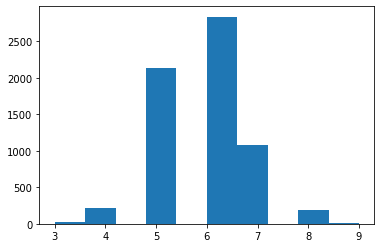

In [29]:
plt.hist(dataset['quality'])

In [30]:
chlorid_withnull = dataset[['chlorides', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

In [31]:
print(chlorid_withnull.head())

   chlorides  fixed acidity  volatile acidity  citric acid  residual sugar  \
0      0.045            7.0              0.27         0.36            20.7   
1      0.049            6.3              0.30         0.34             1.6   
2      0.050            8.1              0.28         0.40             6.9   
3      0.058            7.2              0.23         0.32             8.5   
4      0.058            7.2              0.23         0.32             8.5   

   free sulfur dioxide  density    pH  sulphates  alcohol  
0                 45.0   1.0010  3.00       0.45      8.8  
1                 14.0   0.9940  3.30       0.49      9.5  
2                 30.0   0.9951  3.26       0.44     10.1  
3                 47.0   0.9956  3.19       0.40      9.9  
4                 47.0   0.9956  3.19       0.40      9.9  


In [32]:
chlorid_sansnull = chlorid_withnull.dropna()

In [33]:
train_chlo = chlorid_sansnull.iloc[:, 1:]

In [34]:
test_chlo = chlorid_sansnull.iloc[:, 0]

In [35]:
linreg.fit(train_chlo, test_chlo)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
totaltestchlo = chlorid_withnull.iloc[:, 1:].fillna(0)

In [37]:
totaltestchlo['chlorides'] = pd.DataFrame(linreg.predict(totaltestchlo))

In [38]:
dataset.chlorides.fillna(totaltestchlo.chlorides, inplace = True)

In [39]:
dataset.chlorides.isnull().sum()

0

In [40]:
dataset.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      9
sulphates               4
alcohol                 0
quality                 0
dtype: int64

In [41]:
dataset[dataset['pH'].isnull()]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
54,white,6.800000,0.200,0.59,0.9,0.147,38.0,132.0,0.99300,NaN,0.38,9.1,6
139,white,8.100000,0.280,0.39,1.9,0.029,18.0,79.0,0.99230,NaN,0.52,11.8,6
440,white,6.700000,0.220,0.37,1.6,0.028,24.0,102.0,0.99130,NaN,0.59,11.6,7
587,white,6.100000,0.320,0.25,1.7,0.034,37.0,136.0,0.99200,NaN,0.50,10.8,7
697,white,7.500000,0.310,0.51,14.8,0.039,62.0,204.0,0.99820,NaN,0.60,9.5,5
972,white,6.800000,0.220,0.35,17.5,0.039,38.0,153.0,0.99940,NaN,0.42,9.0,6
4892,white,6.500000,0.230,0.38,1.3,0.032,29.0,112.0,0.99298,NaN,0.54,9.7,5
6428,red,20.647927,0.440,0.09,2.2,0.063,9.0,18.0,0.99444,NaN,0.69,11.3,6
6429,red,20.722735,0.705,0.10,2.8,0.081,13.0,28.0,0.99631,NaN,0.66,10.2,5


In [42]:
dataset.pH.fillna(dataset.pH.mean(), inplace = True)

In [43]:
dataset[dataset['sulphates'].isnull()]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
224,white,6.300000,0.495,0.22,1.8,0.046,31.0,140.0,0.99290,3.39,NaN,10.4,6
2902,white,6.676101,0.360,0.14,8.9,0.036,38.0,155.0,0.99622,3.27,NaN,9.4,5
6321,red,6.400000,0.530,0.09,3.9,0.123,14.0,31.0,0.99680,3.50,NaN,11.0,4
6493,red,5.900000,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6


In [44]:
sul_withnull = dataset[['sulphates','fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'alcohol']]

In [45]:
sul_sansnull = sul_withnull.dropna()

In [46]:
trainsul = sul_sansnull.iloc[:, 1:]

In [47]:
testsul = sul_sansnull.iloc[:,0]

In [48]:
linreg.fit(trainsul, testsul)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
final = sul_withnull.iloc[:,1:]

In [50]:
final['sul'] = linreg.predict(final)

In [51]:
dataset['sulphates'].fillna(final.sul, inplace = True)

In [52]:
dataset.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

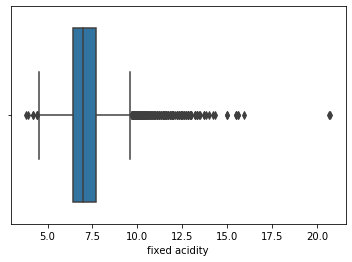

In [53]:
sns.boxplot(dataset['fixed acidity'])

In [54]:
dataset['fixed acidity'].describe()

count    6497.000000
mean        7.219702
std         1.317716
min         3.800000
25%         6.400000
50%         7.000000
75%         7.700000
max        20.722735
Name: fixed acidity, dtype: float64

In [55]:
dataset['fixed acidity'] = np.where(dataset['fixed acidity'] > 16, 16, dataset['fixed acidity'])

In [56]:
dataset['fixed acidity'].describe()

count    6497.000000
mean        7.218259
std         1.305482
min         3.800000
25%         6.400000
50%         7.000000
75%         7.700000
max        16.000000
Name: fixed acidity, dtype: float64

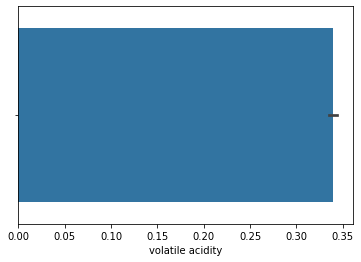

In [57]:
sns.barplot(dataset['volatile acidity'])

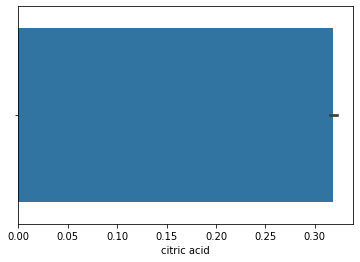

In [58]:
sns.barplot(dataset['citric acid'])

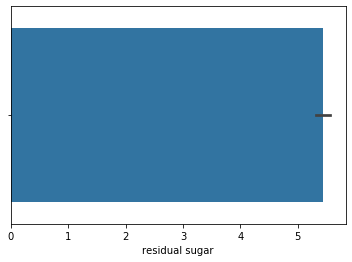

In [59]:
sns.barplot(dataset['residual sugar'])

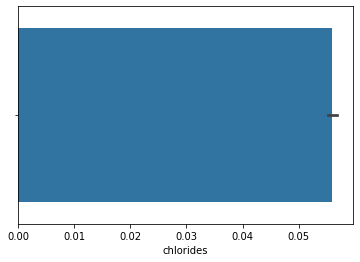

In [60]:
sns.barplot(dataset['chlorides'])

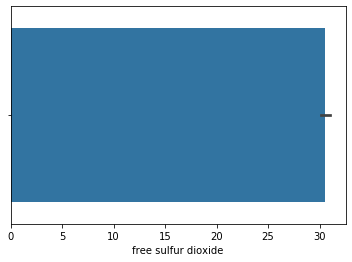

In [61]:
sns.barplot(dataset['free sulfur dioxide'])

In [62]:
dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


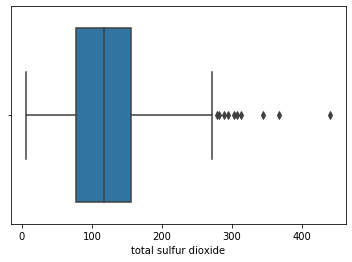

In [63]:
sns.boxplot(dataset['total sulfur dioxide'])

In [64]:
dataset['total sulfur dioxide'].describe()

count    6497.000000
mean      115.744574
std        56.521855
min         6.000000
25%        77.000000
50%       118.000000
75%       156.000000
max       440.000000
Name: total sulfur dioxide, dtype: float64

In [65]:
dataset['total sulfur dioxide'] = np.where(dataset['total sulfur dioxide'] > 270, 270, dataset['total sulfur dioxide'])

In [66]:
dataset['total sulfur dioxide'].describe()

count    6497.000000
mean      115.664384
std        56.235206
min         6.000000
25%        77.000000
50%       118.000000
75%       156.000000
max       270.000000
Name: total sulfur dioxide, dtype: float64

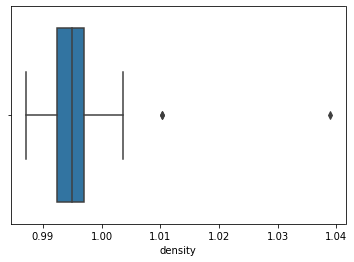

In [67]:
sns.boxplot(dataset['density'])

In [68]:
dataset[dataset['density'] > 1.003]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1653,white,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1663,white,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
2781,white,7.8,0.965,0.60,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6
5340,red,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7
5452,red,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
5453,red,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
5455,red,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
6332,red,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,6
6333,red,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,6


In [69]:
dataset['density'] = np.where(dataset['density'] > 1.004, 1.003, dataset['density'])

In [70]:
dataset['density'].describe()

count    6497.000000
mean        0.994689
std         0.002941
min         0.987110
25%         0.992340
50%         0.994890
75%         0.996990
max         1.003690
Name: density, dtype: float64

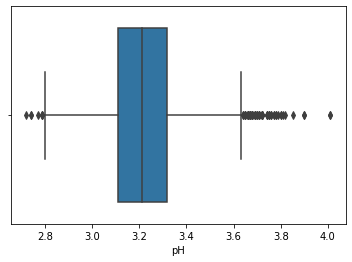

In [71]:
sns.boxplot(dataset['pH'])

In [72]:
dataset[dataset['pH'] > 3.6]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
72,white,6.0,0.270,0.28,4.80,0.063,31.0,201.0,0.99640,3.69,0.71,10.0,5
115,white,5.5,0.485,0.00,1.50,0.065,8.0,103.0,0.99400,3.63,0.40,9.7,4
250,white,5.9,0.210,0.28,4.60,0.053,40.0,199.0,0.99640,3.72,0.70,10.0,4
320,white,6.0,0.100,0.24,1.10,0.041,15.0,65.0,0.99270,3.61,0.61,10.3,7
507,white,6.0,0.240,0.27,1.90,0.048,40.0,170.0,0.99380,3.64,0.54,10.0,7
509,white,6.0,0.240,0.27,1.90,0.048,40.0,170.0,0.99380,3.64,0.54,10.0,7
830,white,7.3,0.205,0.31,1.70,0.060,34.0,110.0,0.99630,3.72,0.69,10.5,6
834,white,7.3,0.205,0.31,1.70,0.060,34.0,110.0,0.99630,3.72,0.69,10.5,6
1014,white,6.1,0.160,0.27,12.60,0.064,63.0,162.0,0.99940,3.66,0.43,8.9,5
1250,white,5.3,0.260,0.23,5.15,0.034,48.0,160.0,0.99520,3.82,0.51,10.5,7


In [73]:
dataset['pH'] = np.where(dataset['pH'] > 3.6, 3.6, dataset.pH)

In [74]:
dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


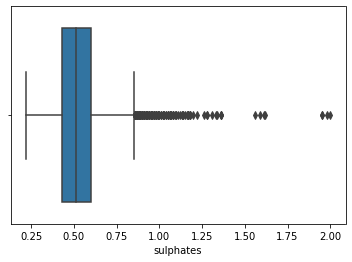

In [75]:
sns.boxplot(dataset.sulphates)

In [76]:
dataset['sulphates'] = np.where(dataset['sulphates'] > 1.2, 1.2, dataset.sulphates)

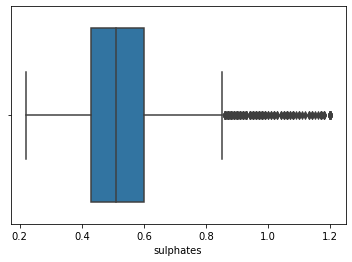

In [77]:
sns.boxplot(dataset.sulphates)

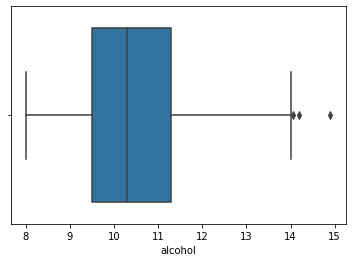

In [78]:
sns.boxplot(dataset.alcohol)

In [79]:
from imblearn.over_sampling import SMOTE

In [80]:
label = LabelEncoder()

In [81]:
dataset['type'] = label.fit_transform(dataset['type'])

In [82]:
print(dataset['type'])

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
6467    0
6468    0
6469    0
6470    0
6471    0
6472    0
6473    0
6474    0
6475    0
6476    0
6477    0
6478    0
6479    0
6480    0
6481    0
6482    0
6483    0
6484    0
6485    0
6486    0
6487    0
6488    0
6489    0
6490    0
6491    0
6492    0
6493    0
6494    0
6495    0
6496    0
Name: type, Length: 6497, dtype: int32


In [83]:
dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [84]:
X = dataset.iloc[:, :12].values

In [85]:
y = dataset.iloc[:, 12].values

In [86]:
ss = StandardScaler()

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [88]:
X_train = ss.fit_transform(X_train)

In [89]:
X_test = ss.transform(X_test)

In [90]:
smote = SMOTE(k_neighbors = 2)

In [91]:
X_train, y_train = smote.fit_sample(X_train, y_train)

In [92]:
np.bincount(y_train)

array([   0,    0,    0, 2273, 2273, 2273, 2273, 2273, 2273, 2273],
      dtype=int64)

In [131]:
neighbor = KNeighborsClassifier(n_neighbors = 5)

In [139]:
class_weight = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

In [142]:
neighbor.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [133]:
y_pred = neighbor.predict(X_test)

In [134]:
cm = confusion_matrix(y_test, y_pred)

In [135]:
print(cm)

[[  0   2   2   0   1   1   0]
 [  0  21  17   5   5   0   0]
 [ 10  54 269  66  23   9   0]
 [  3  39 159 232  98  27   5]
 [  1   5  14  41 132  19   1]
 [  0   1   2   1  13  20   1]
 [  0   1   0   0   0   0   0]]


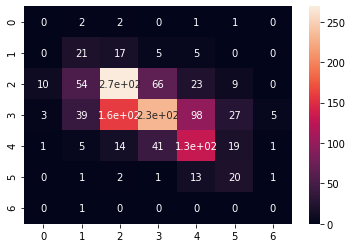

In [136]:
sns.heatmap(cm, annot = True)

In [99]:
import numpy as np
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None): 
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

NameError: name 'normalize' is not defined

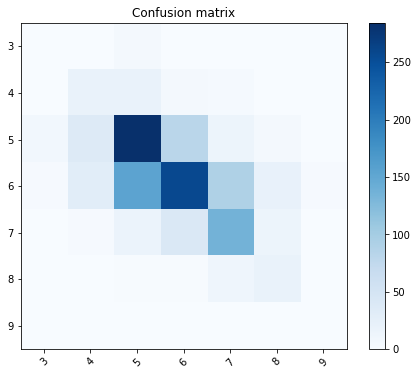

In [100]:
plot_confusion_matrix(cm = cm,
                          target_names = ['3', '4', '5', '6', '7', '8', '9'],
                          title='Confusion matrix',
                          cmap = None)

In [128]:
class DummyEstimator(BaseEstimator):
    def fit(self): pass
    def score(self): pass

pipe = Pipeline([('clf', DummyEstimator())])
search_space = [{'clf': [KNeighborsClassifier()]},
                {'clf': [SVC()]},
               {'clf': [DecisionTreeClassifier()]}]


# Create grid search 
gs = GridSearchCV(pipe, search_space, scoring = 'accuracy', cv = 10)

In [129]:
gs.fit(X_train, y_train)

C:\Users\Zoli\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Zoli\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Zoli\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Zoli\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None, steps=[('clf', DummyEstimator())],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'clf': [KNeighborsClassifier(algorithm='auto',
                                                       leaf_size=30,
                                                       metric='minkowski',
                                                       metric_params=None,
                                                       n_jobs=None,
                                                       n_neighbors=5, p=2,
                                                       weights='uniform')]},
                         {'clf': [SVC(C=1.0, cache_size=200, clas...
                         {'clf': [DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                 

In [130]:
print(gs.best_score_)
print(gs.best_estimator_)

0.825655207089435
Pipeline(memory=None,
         steps=[('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)


In [145]:
svc = SVC(kernel = 'poly', class_weight = 'balanced')

In [146]:
svc.fit(X_train, y_train)

C:\Users\Zoli\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [147]:
y_pred = svc.predict(X_test)

In [148]:
cm = confusion_matrix(y_test, y_pred)

In [149]:
print(cm)

[[  1   3   0   2   0   0   0]
 [  5  20  12   9   2   0   0]
 [ 14  72 227 104  11   3   0]
 [ 14  49 113 255  97  33   2]
 [  1  10   7  54  94  45   2]
 [  0   2   0   9  12  14   1]
 [  0   0   0   1   0   0   0]]


In [151]:
model = TSNE(learning_rate = 100)

In [152]:
transformed = model.fit_transform(dataset)

In [153]:
xs = transformed[:,0]
ys = transformed[:,1]

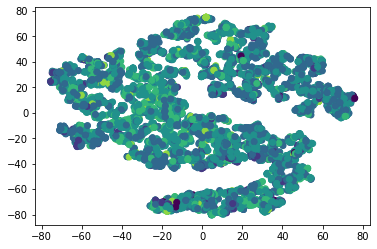

In [159]:
fig, ax = plt.subplots()
scatter = ax.scatter(xs, ys, c = dataset['quality'])